In [42]:
!pip install joblib==1.3.2

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

Data Processing

In [44]:
car_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [45]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Converting Indian Rupees to Philippine Peso

In [46]:
def convert_to_php(price_inr):
        """Converts a price in Indian Rupees to Philippine Pesos using a fixed exchange rate.

        Args:
            price_inr: The price in Indian Rupees.

        Returns:
            The price in Philippine Pesos.
        """
        exchange_rate = 0.67  # Update this with the latest exchange rate
        price_php = price_inr * exchange_rate
        return price_php

In [47]:
car_dataset['selling_price'] = car_dataset['selling_price'].apply(convert_to_php)

In [48]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,40200.0,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,90450.0,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,402000.0,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,167500.0,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,301500.0,141000,Diesel,Individual,Manual,Second Owner


In [49]:
car_dataset.shape

(4340, 8)

In [50]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   float64
 3   km_driven      4340 non-null   int64  
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB


In [51]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [52]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding Categorical Data

In [53]:
#Fuel type encoding column
car_dataset.replace({'fuel':{'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)
#Seller type encoding column
car_dataset.replace({'seller_type':{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace=True)
#Transmission type encoding column
car_dataset.replace({'transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)
#Owner type encoding column
car_dataset.replace({'owner':{'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace=True)

<ipython-input-53-ef9123fa0fea>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)
<ipython-input-53-ef9123fa0fea>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace=True)
<ipython-input-53-ef9123fa0fea>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [54]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,40200.0,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,90450.0,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,402000.0,100000,1,0,0,0
3,Datsun RediGO T Option,2017,167500.0,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,301500.0,141000,1,0,0,1


Splitting the data and target

In [55]:
X = car_dataset.drop(['name'],axis=1)
Y = car_dataset['selling_price']

In [56]:
print(X)

      year  selling_price  km_driven  fuel  seller_type  transmission  owner
0     2007       40200.00      70000     0            0             0      0
1     2007       90450.00      50000     0            0             0      0
2     2012      402000.00     100000     1            0             0      0
3     2017      167500.00      46000     0            0             0      0
4     2014      301500.00     141000     1            0             0      1
...    ...            ...        ...   ...          ...           ...    ...
4335  2014      274699.33      80000     1            0             0      1
4336  2014      274699.33      80000     1            0             0      1
4337  2009       73700.00      83000     0            0             0      1
4338  2016      579550.00      90000     1            0             0      0
4339  2016      150750.00      40000     0            0             0      0

[4340 rows x 7 columns]


In [57]:
print(Y)

0        40200.00
1        90450.00
2       402000.00
3       167500.00
4       301500.00
          ...    
4335    274699.33
4336    274699.33
4337     73700.00
4338    579550.00
4339    150750.00
Name: selling_price, Length: 4340, dtype: float64


Splitting Training and Test data

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

Linear Regression,
Random Forest Regressor,
XGBRegressor

In [59]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

xg = XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Test data

In [60]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

Evaluating the Algorithm

In [61]:
score1 = metrics.r2_score(Y_test,y_pred1)
score2 = metrics.r2_score(Y_test,y_pred2)
score3 = metrics.r2_score(Y_test,y_pred3)
score4 = metrics.r2_score(Y_test,y_pred4)

In [62]:
print(score1,score2,score3,score4)

1.0 0.9980640850835559 0.9988269799485217 0.9954715250499053


In [63]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [64]:
final_data

,Models,R2_SCORE
0,LR,1.000000
1,RF,0.998064
2,GBR,0.998827
3,XG,0.995472


<Axes: xlabel='Models', ylabel='R2_SCORE'>

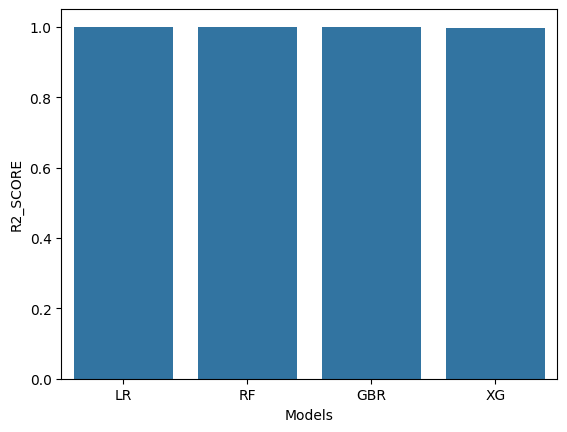

In [65]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)

In [66]:
xg = XGBRegressor()
xg_final = xg.fit(X,Y)

In [67]:
import joblib

In [68]:
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [69]:
model = joblib.load('car_price_predictor')

In [70]:
xg_final.save_model('xgb_model.json')

Prediction on New Data

In [71]:
data_new = pd.DataFrame({
    'year': 2023 - 8,
    'selling_price': 0,
    'km_driven': 27000,
    'fuel': 0,
    'seller_type': 0,
    'transmission': 0,
    'owner': 0
}, index=[0])

In [72]:
model.predict(data_new)

array([25663.96], dtype=float32)

In [73]:
processed_dataset = pd.concat([X, Y], axis=1)
processed_dataset.to_csv('processed_car_data.csv', index=False)